In [10]:
#pip install wordcloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
from nltk.tokenize import word_tokenize
import numpy as np
# import spacy
# from spacy import displacy
# nlp = spacy.load('en_core_web_sm')
from sklearn.datasets import load_files
import pickle
import re
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [4]:
#make fig size bigger
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 500

In [2]:
df= pd.read_csv('News Classification Dataset.csv')
df

Class Index                                              Title  \
0                 3  Wall St. Bears Claw Back Into the Black (Reuters)   
1                 3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2                 3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3                 3  Iraq Halts Oil Exports from Main Southern Pipe...   
4                 3  Oil prices soar to all-time record, posing new...   
...             ...                                                ...   
119995            1  Pakistan's Musharraf Says Won't Quit as Army C...   
119996            2                  Renteria signing a top-shelf deal   
119997            2                    Saban not going to Dolphins yet   
119998            2                                  Today's NFL games   
119999            2                       Nets get Carter from Raptors   

                                              Description  
0       Reuters - Short-sellers, Wall Street's dwindli...  
1       Reuters - Private investment firm Carlyle Grou...  
2       Reuters - Soaring crude prices plus worries\ab...  
3       Reuters - Authorities have halted oil export\f...  
4       AFP - Tearaway world oil prices, toppling reco...  
...                                                   ...  
119995   KARACHI (Reuters) - Pakistani President Perve...  
119996  Red Sox general manager Theo Epstein acknowled...  
119997  The Miami Dolphins will put their courtship of...  
119998  PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...  
119999  INDIANAPOLIS -- All-Star Vince Carter was trad...  

[120000 rows x 3 columns]

In [3]:
#shuffle and reset the index
df = df.sample(frac=1).reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
df['Class Index'].value_counts()

1    30000
2    30000
3    30000
4    30000
Name: Class Index, dtype: int64

In [7]:
df[df['Class Index']==1]['Title']

492       Venezuelans Vote Early in Referendum on Chavez...
493       S.Koreans Clash with Police on Iraq Troop Disp...
494       Palestinians in Israeli Jails Start Hunger Str...
495       Seven Georgian soldiers wounded as South Osset...
496                    Rwandan Troops Arrive in Darfur (AP)
                                ...                        
119990    Barack Obama Gets  #36;1.9 Million Book Deal (AP)
119992          Iraqis Face Winter Shivering by Candlelight
119993    AU Says Sudan Begins Troop Withdrawal from Darfur
119994      Syria Redeploys Some Security Forces in Lebanon
119995    Pakistan's Musharraf Says Won't Quit as Army C...
Name: Title, Length: 30000, dtype: object

In [8]:
#check common words in title
wordcloud1 = WordCloud().generate(' '.join(df[df['Class Index']==1]['Title']))

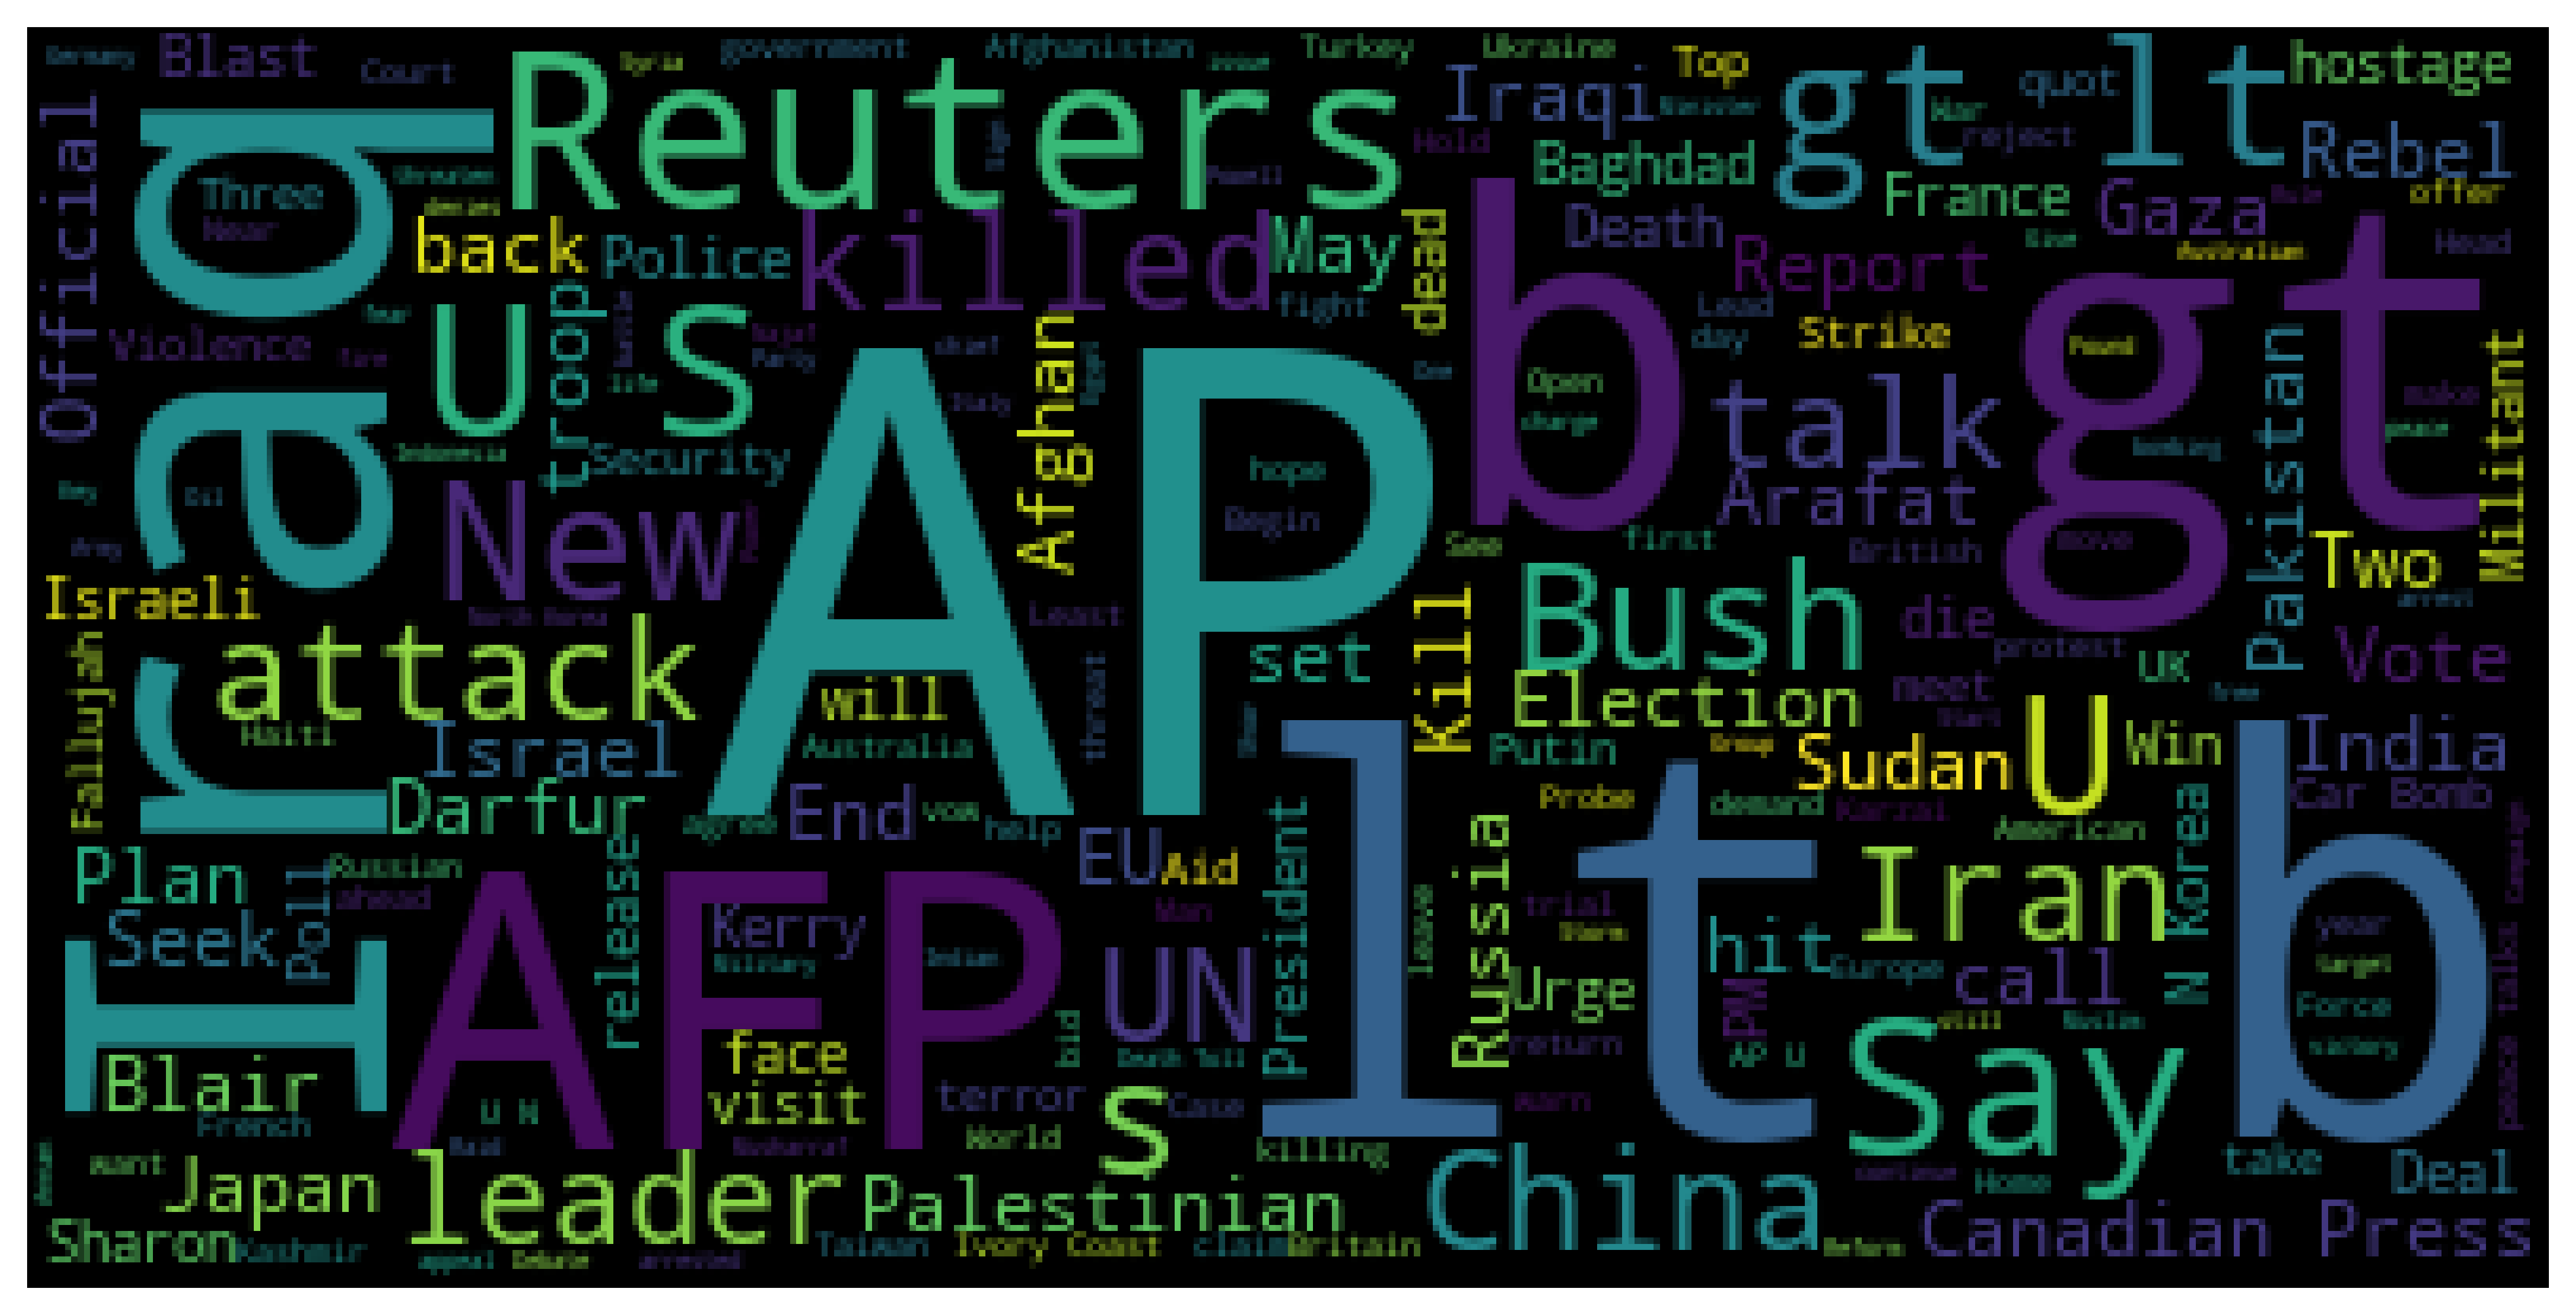

In [9]:
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()



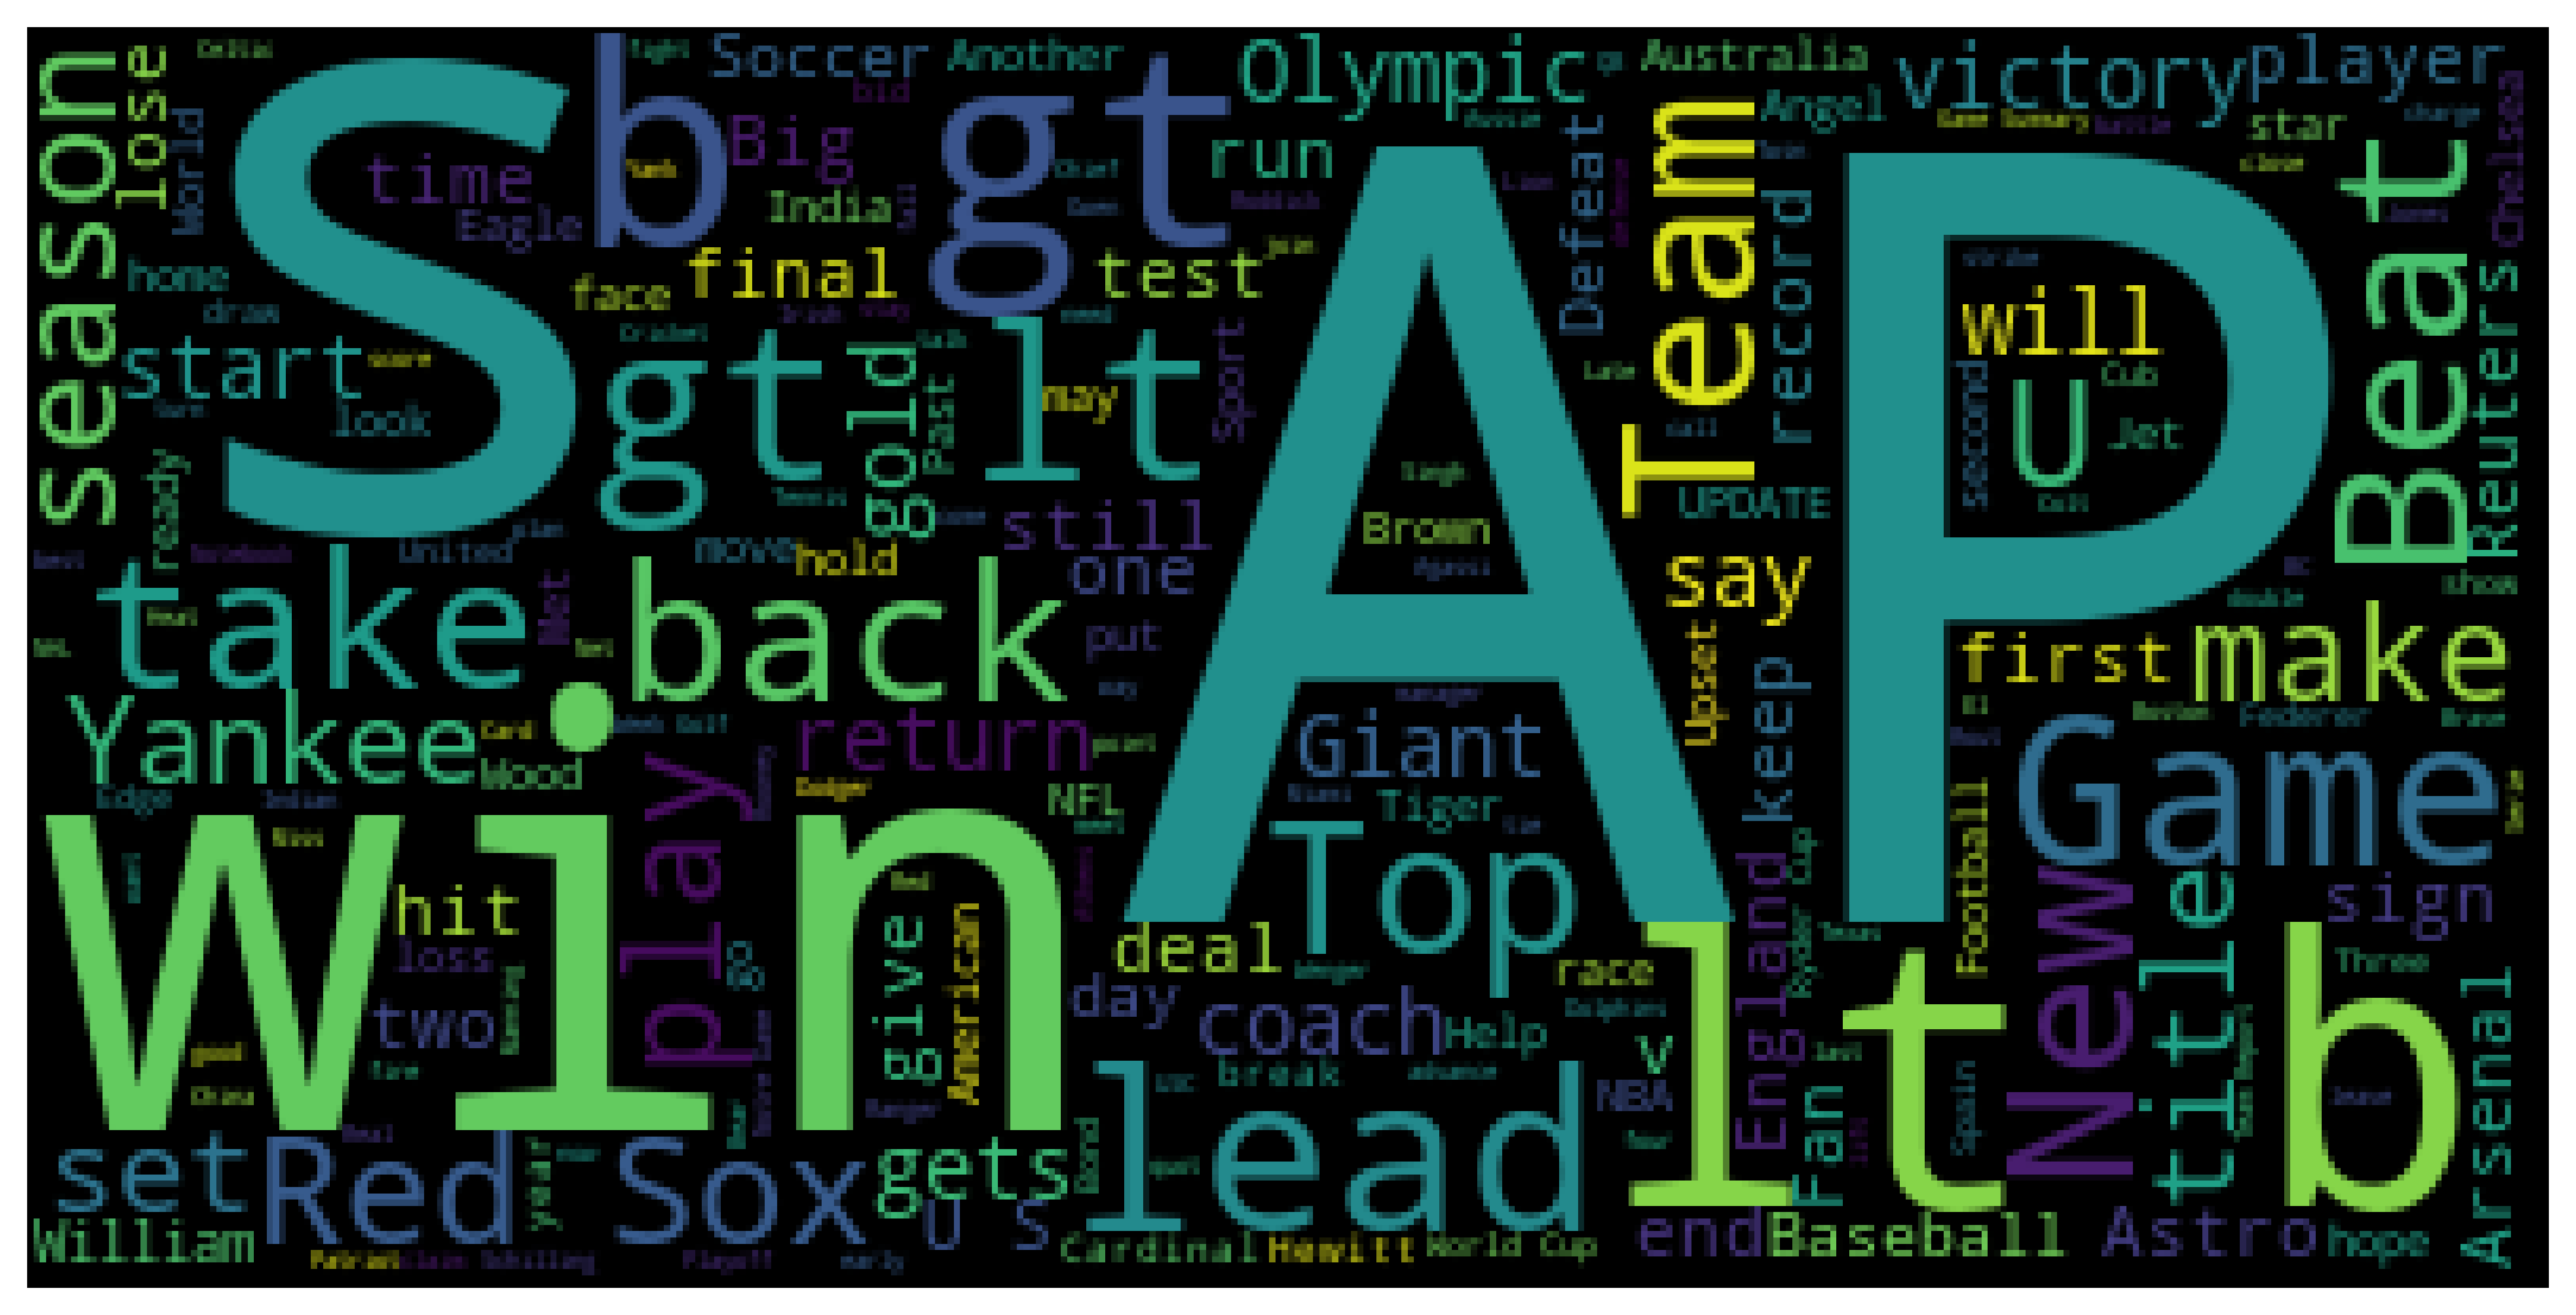

In [10]:
wordcloud2 = WordCloud().generate(' '.join(df[df['Class Index']==2]['Title']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

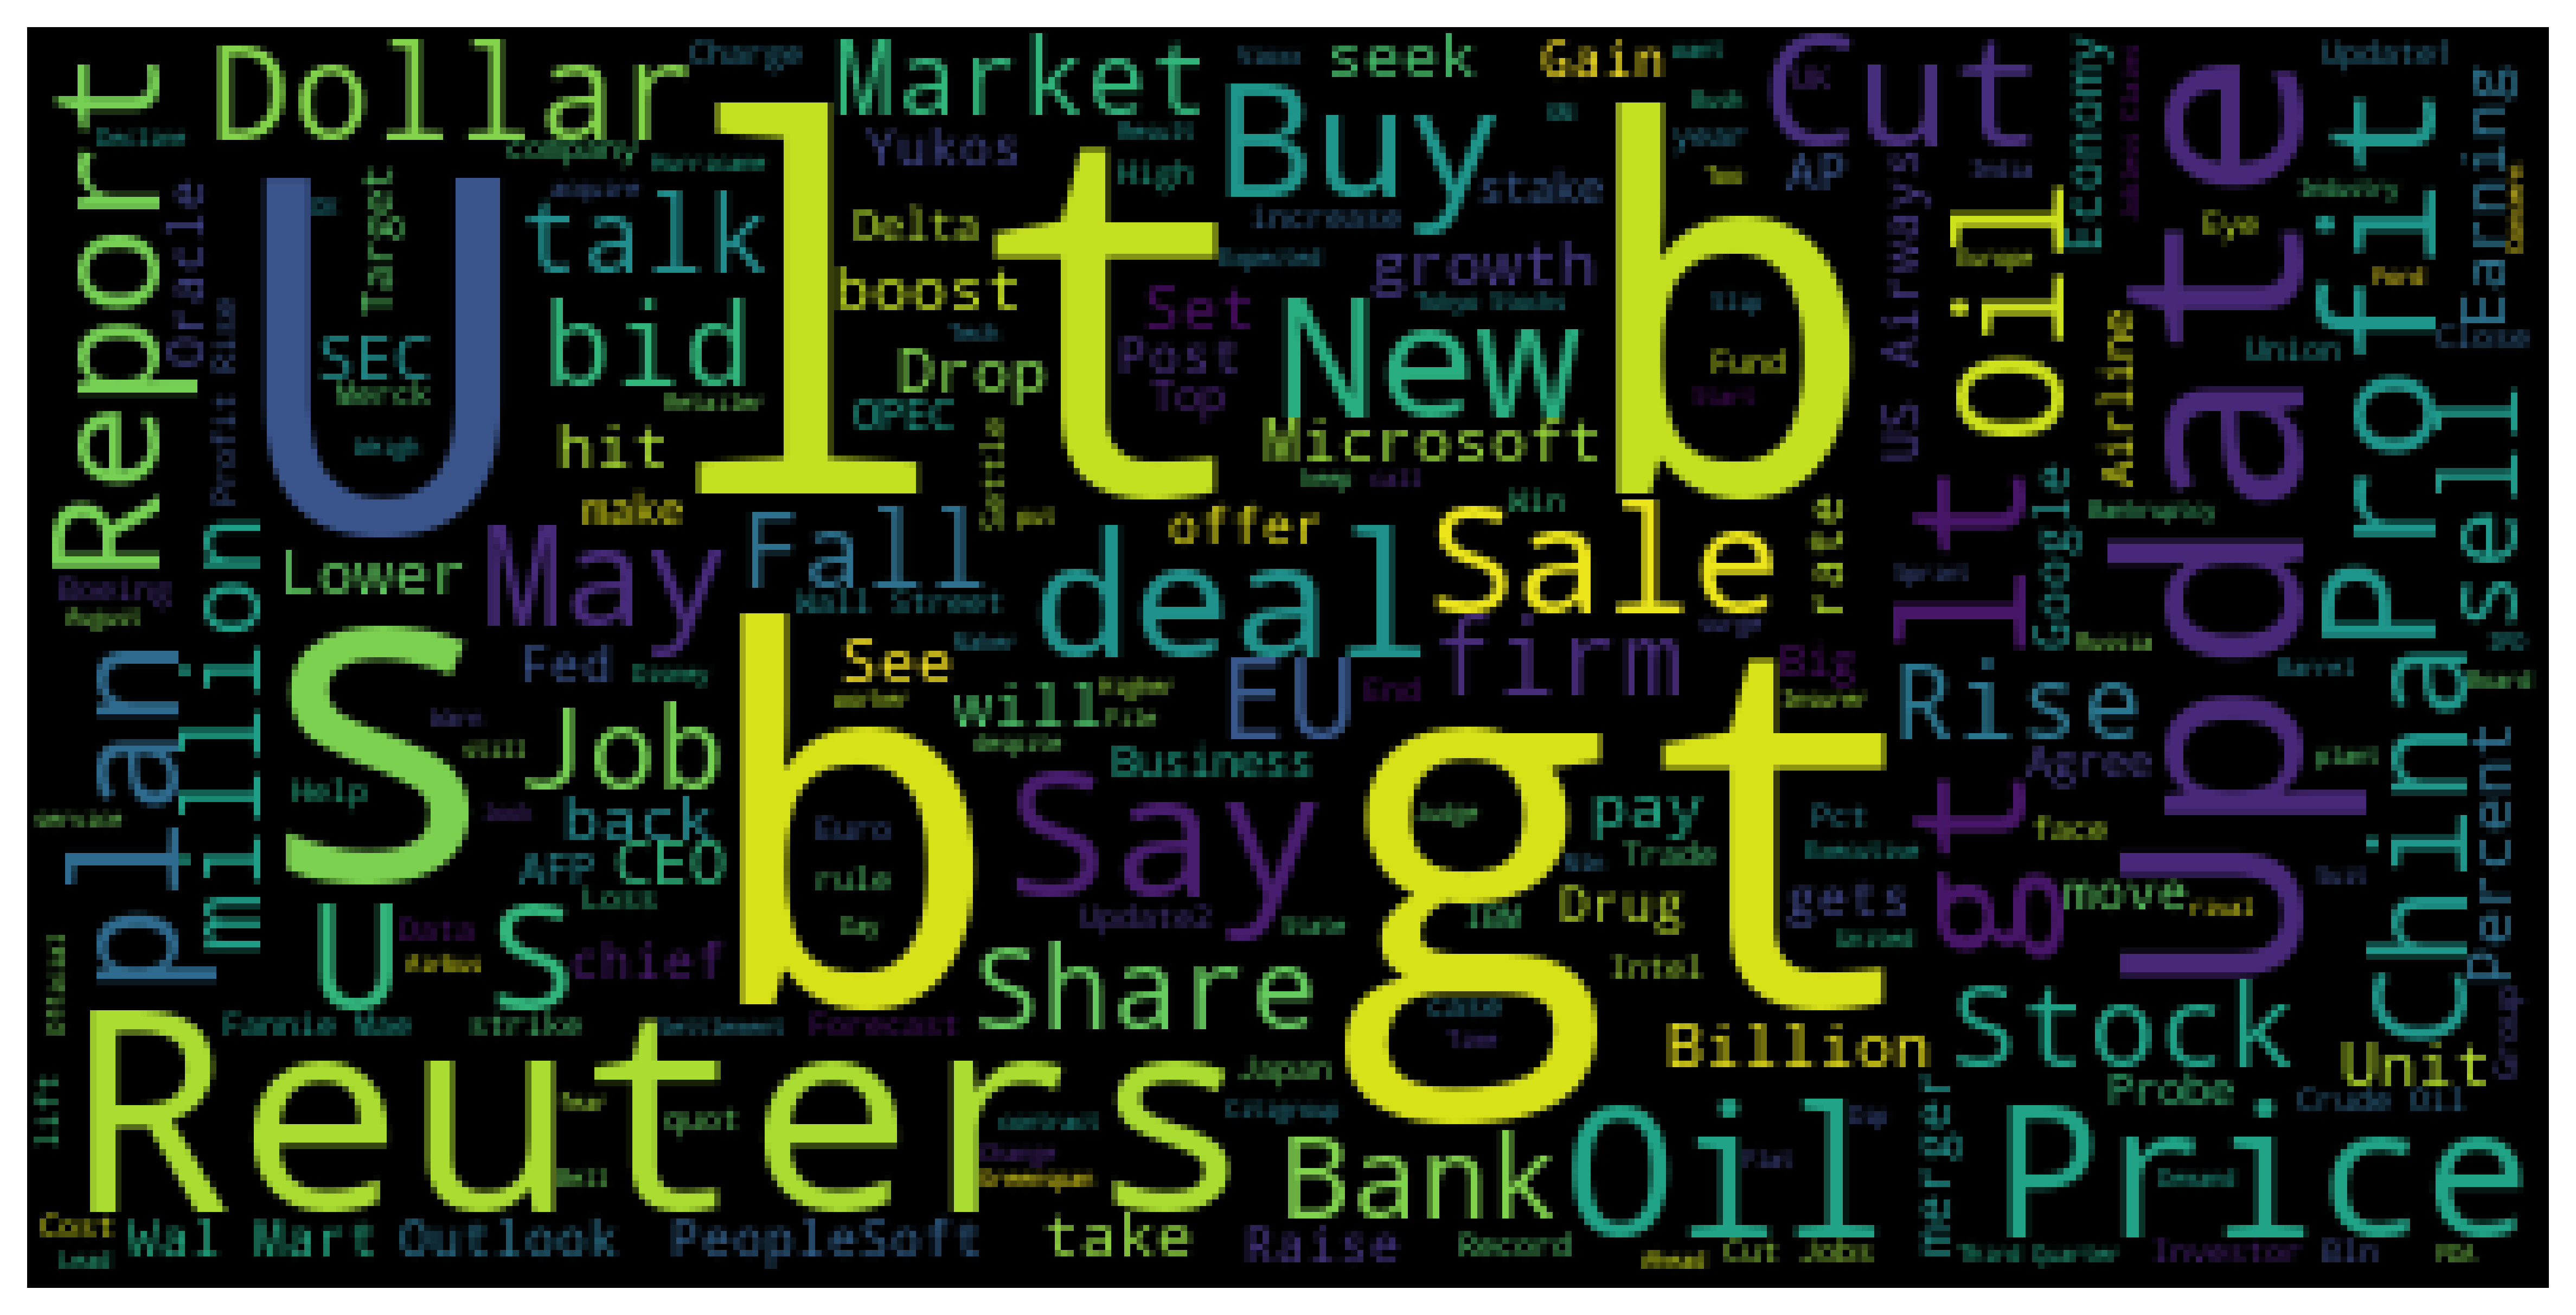

In [11]:
wordcloud3 = WordCloud().generate(' '.join(df[df['Class Index']==3]['Title']))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

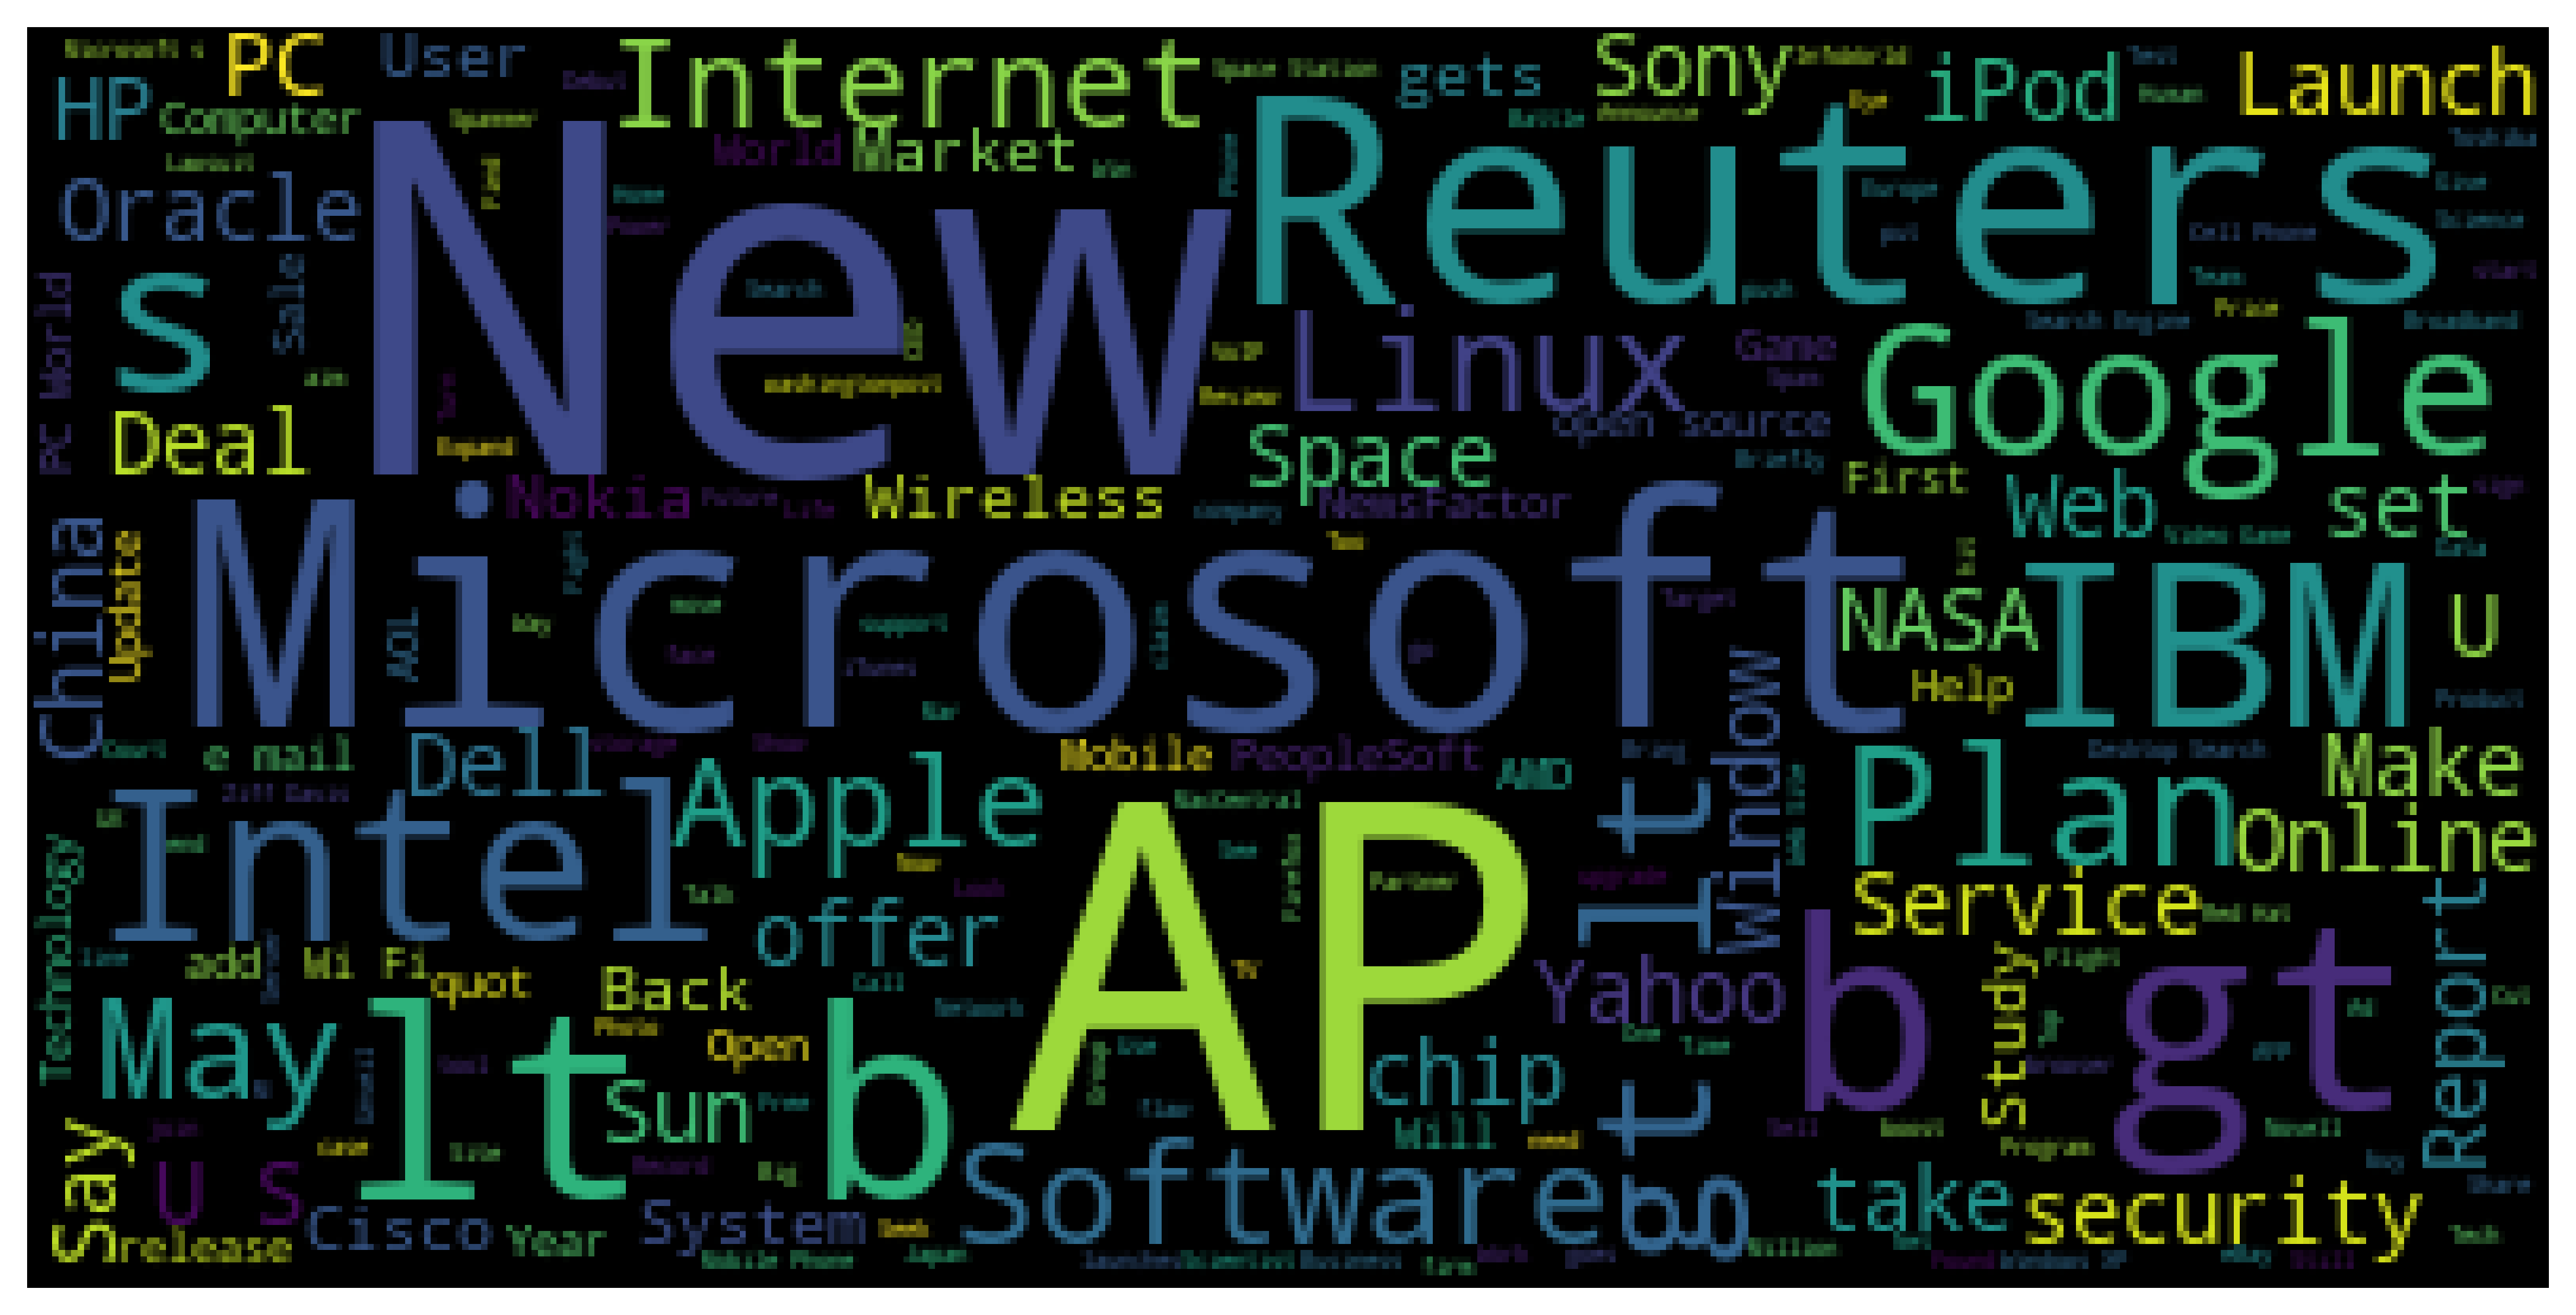

In [12]:
wordcloud4 = WordCloud().generate(' '.join(df[df['Class Index']==4]['Title']))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

>## class 1 ( Politics)
>## class 2 ( Sport)
>## class 3 ( Economy)
>## class 4 ( Technology)

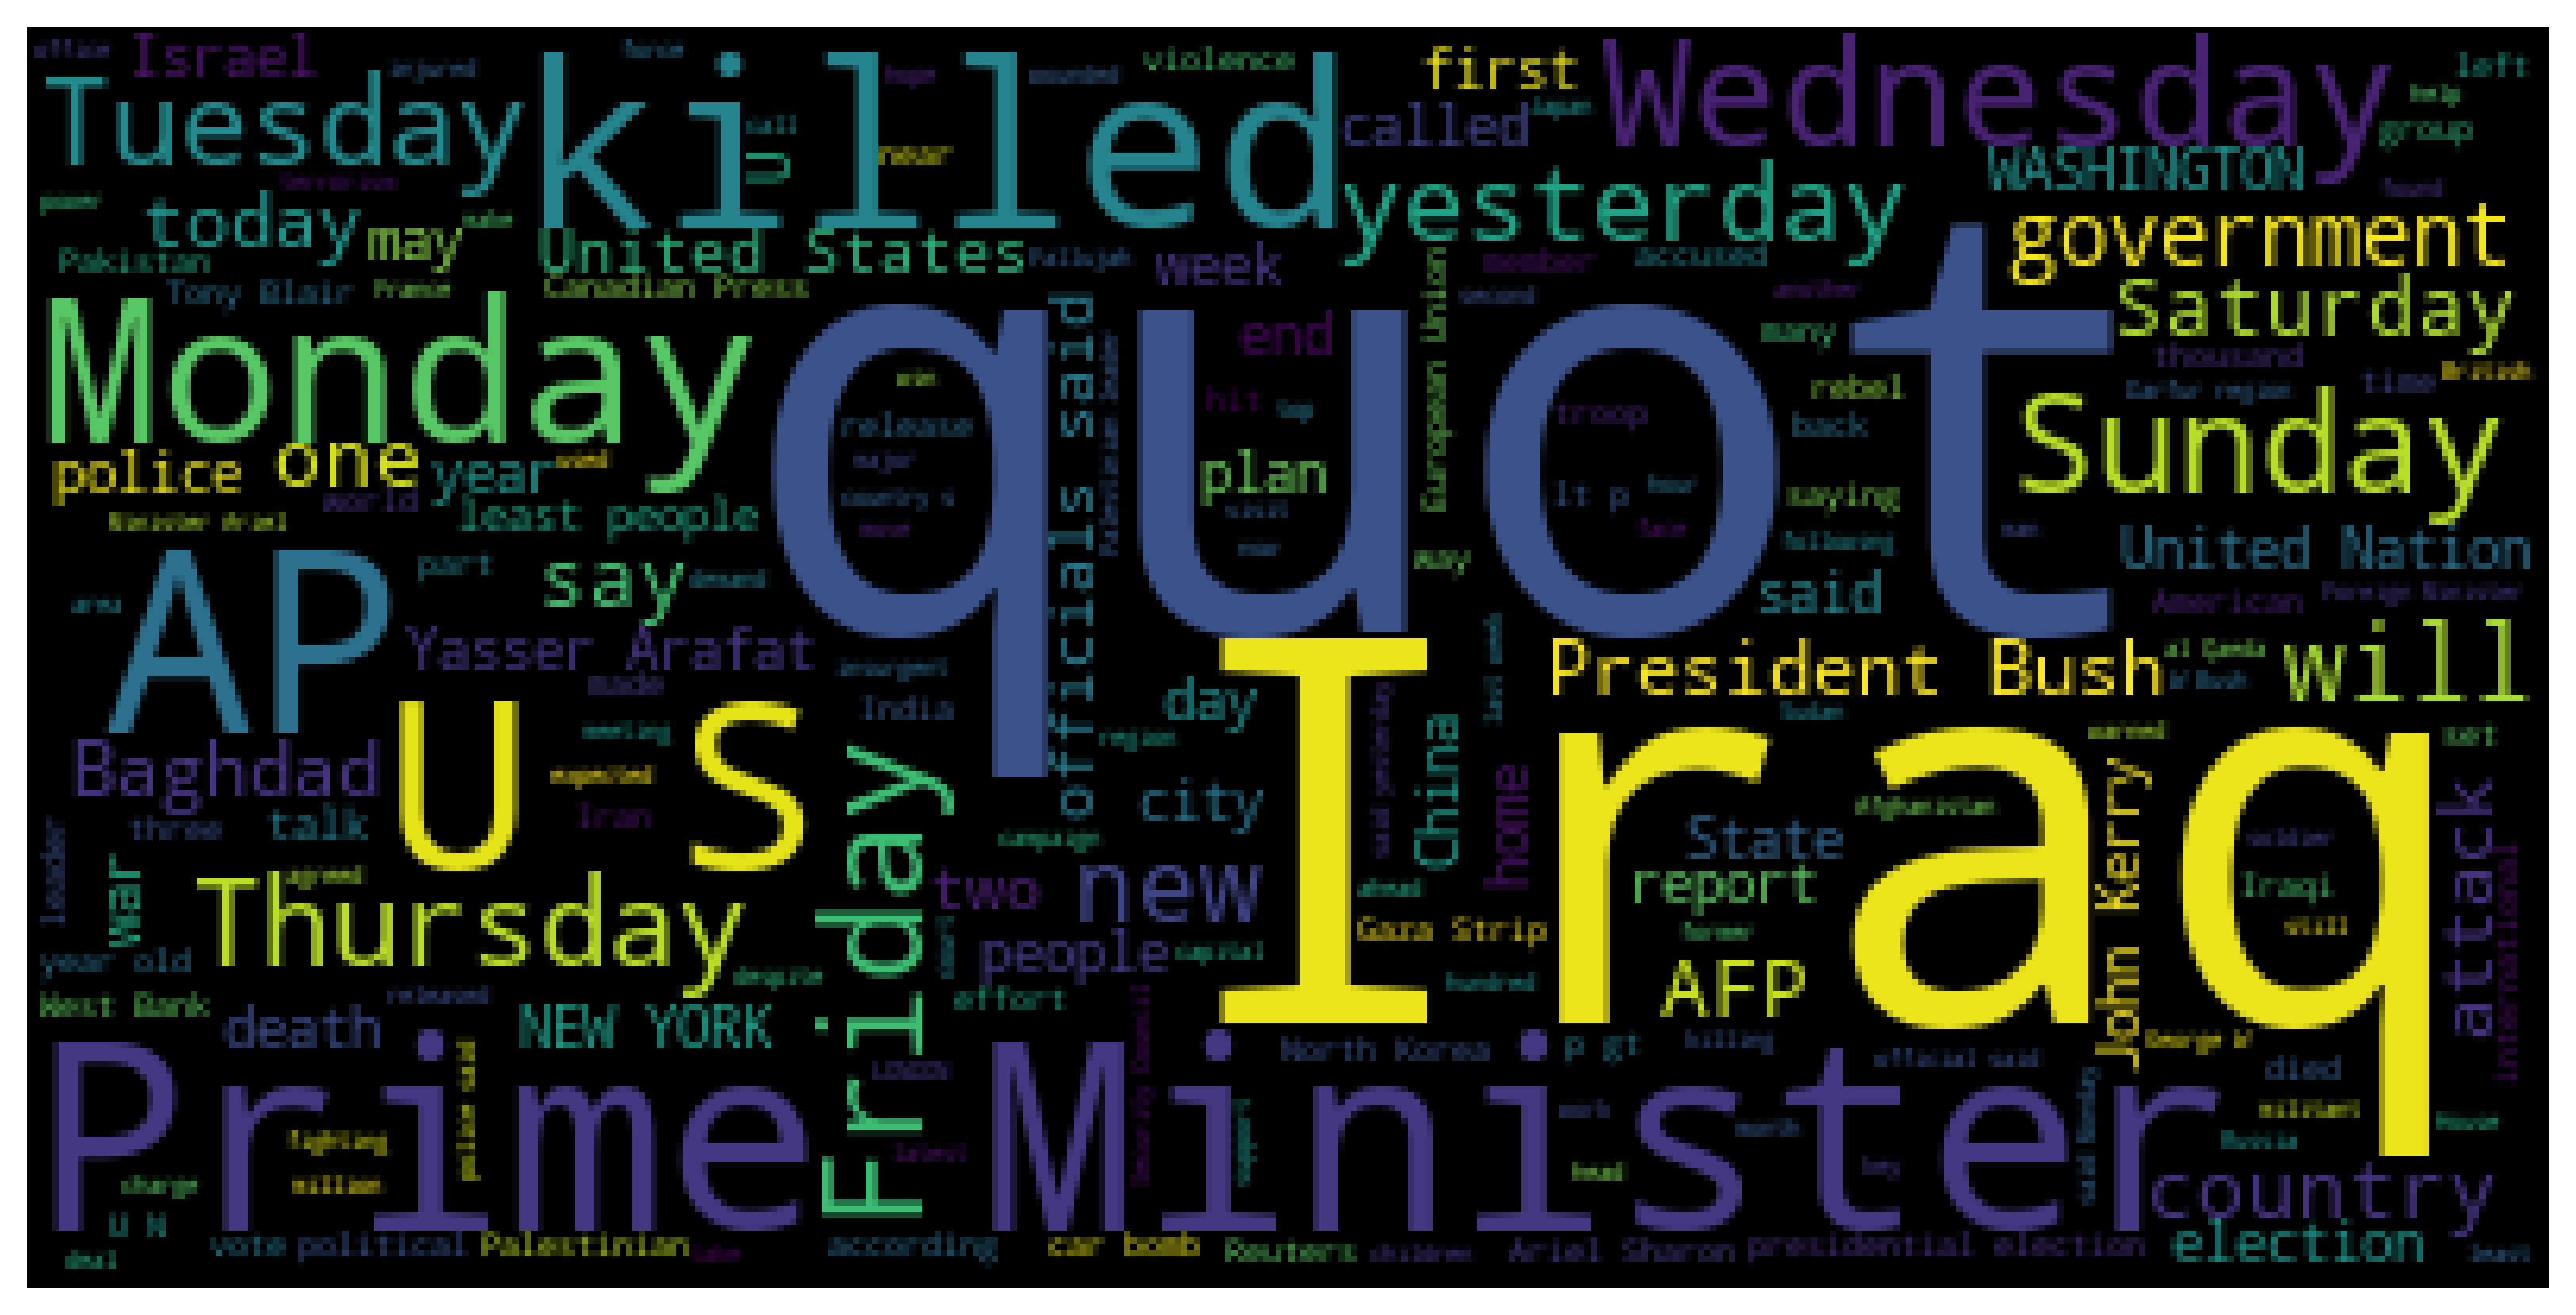

In [13]:
#check common words in Description
wordcloud1 = WordCloud().generate(' '.join(df[df['Class Index']==1]['Description']))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

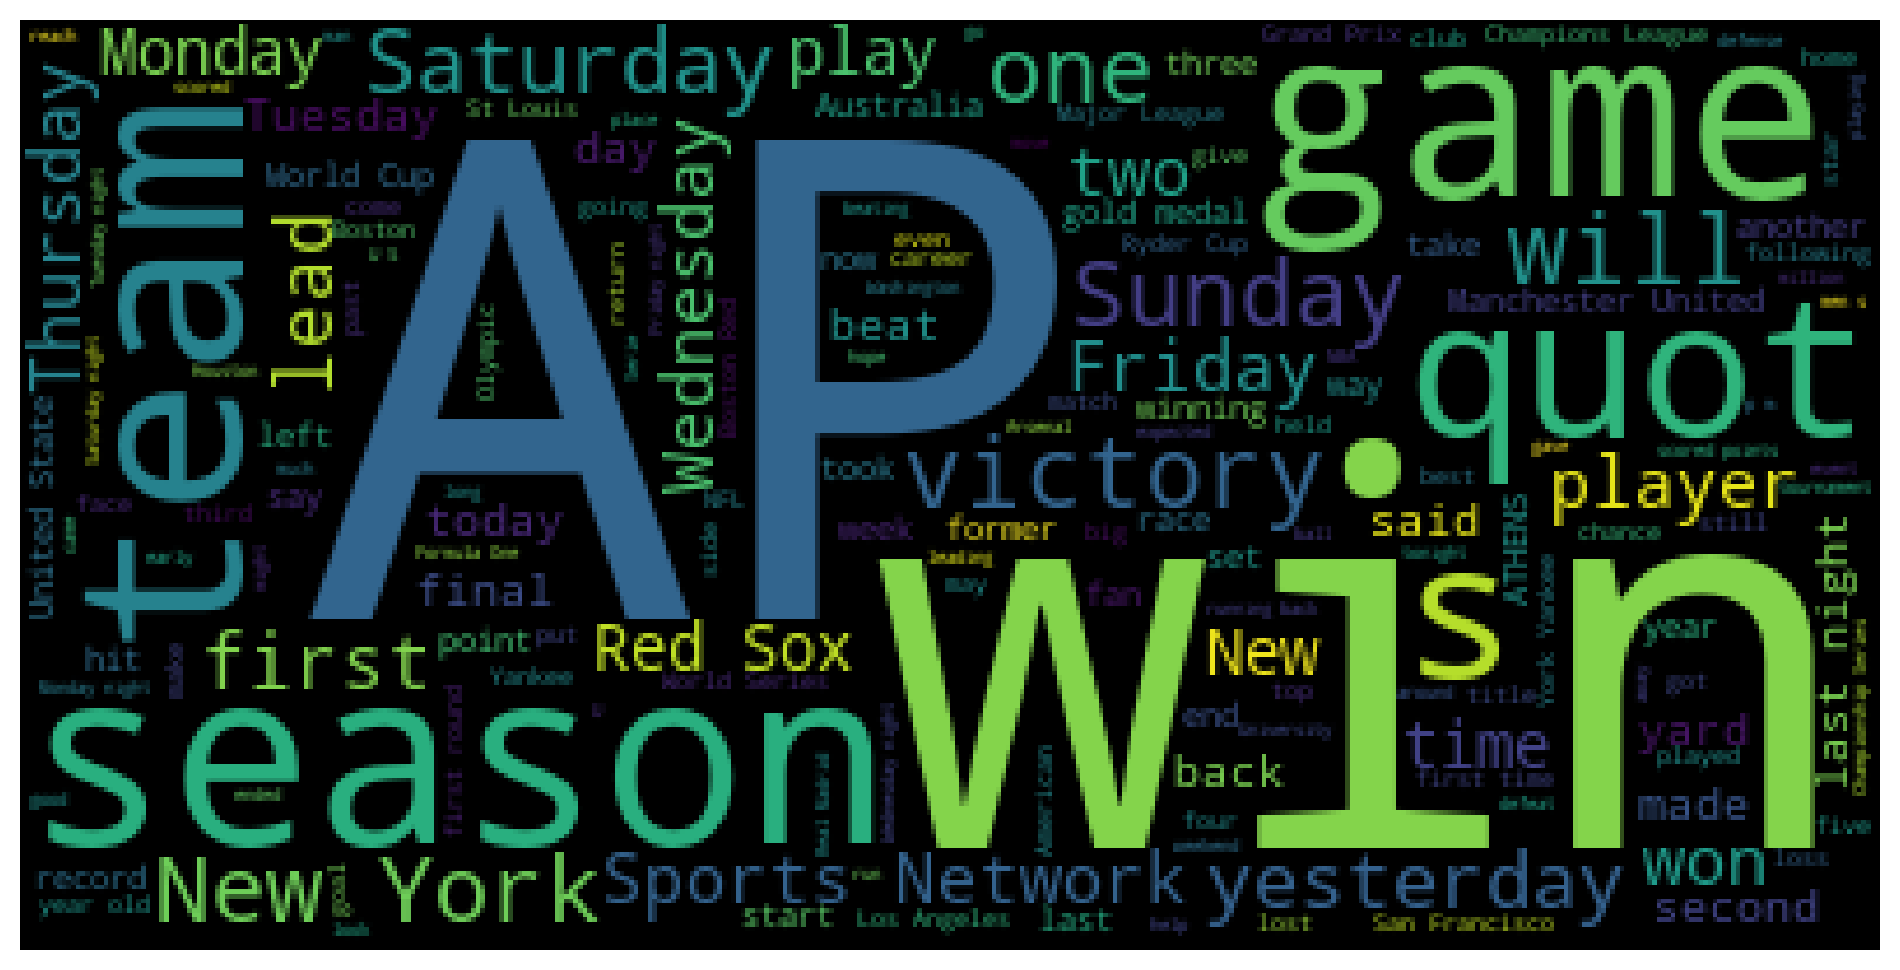

In [46]:
wordcloud2 = WordCloud().generate(' '.join(df[df['Class Index']==2]['Description']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

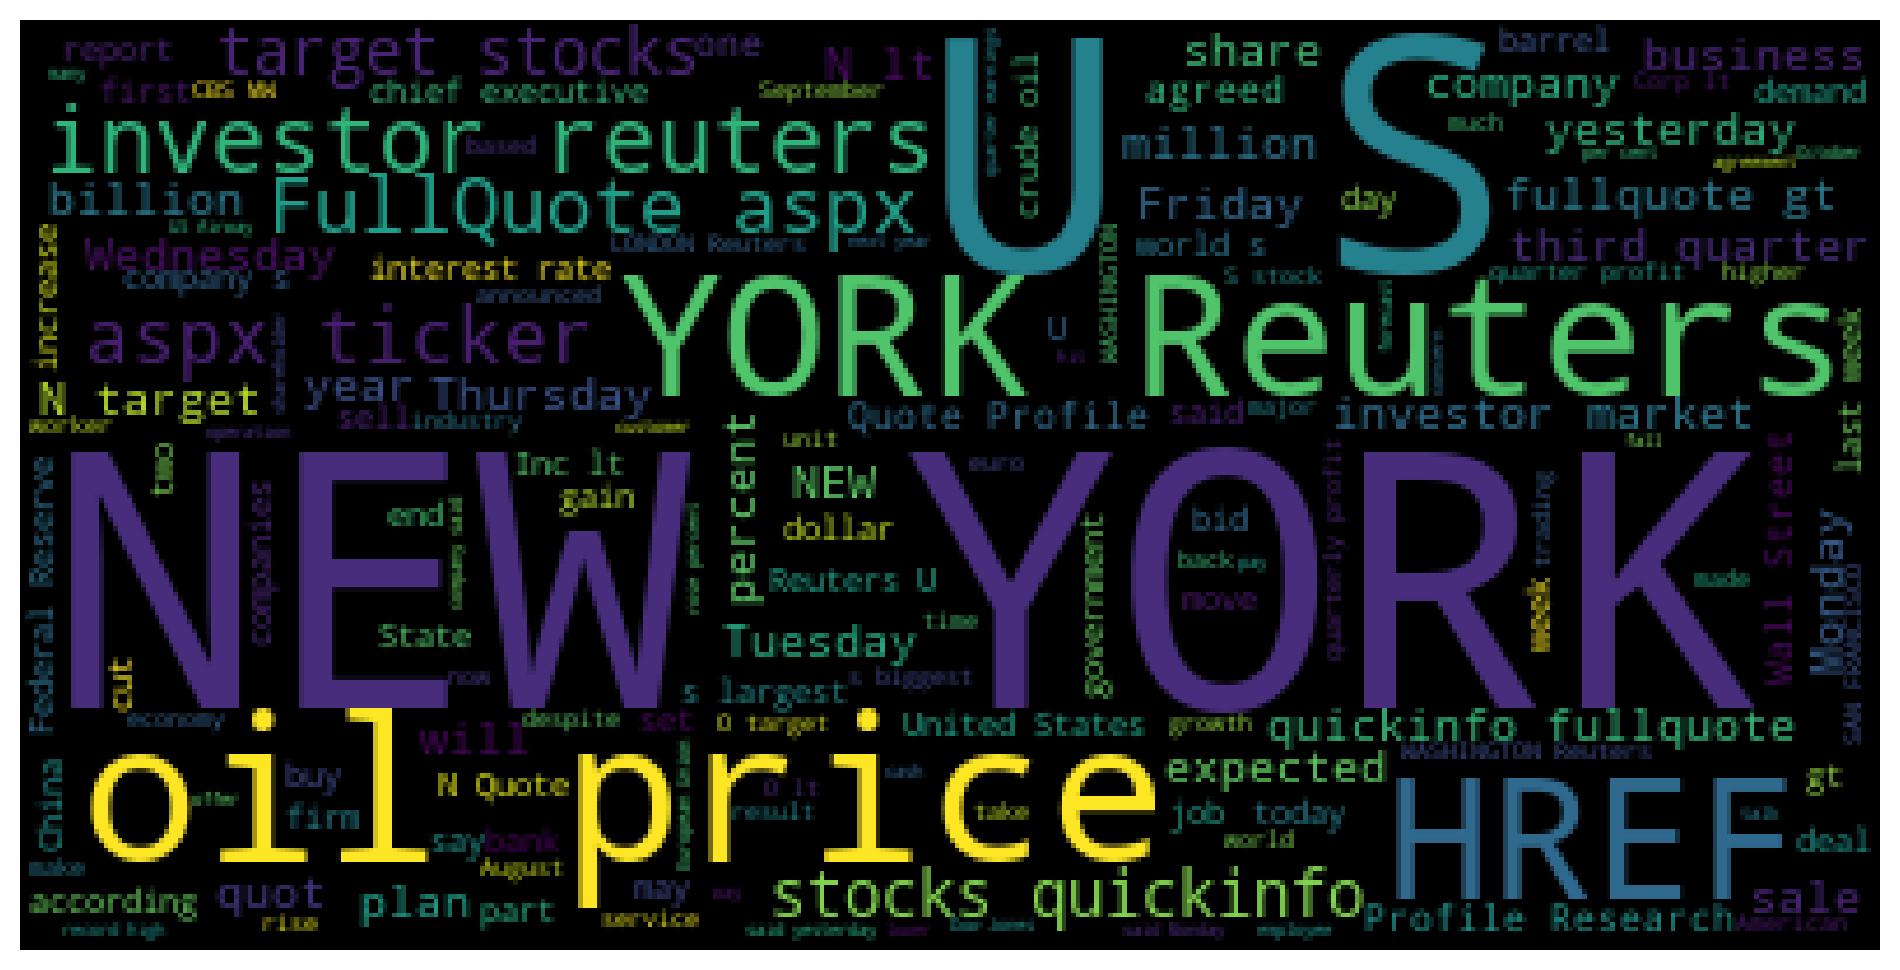

In [47]:
wordcloud3 = WordCloud().generate(' '.join(df[df['Class Index']==3]['Description']))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

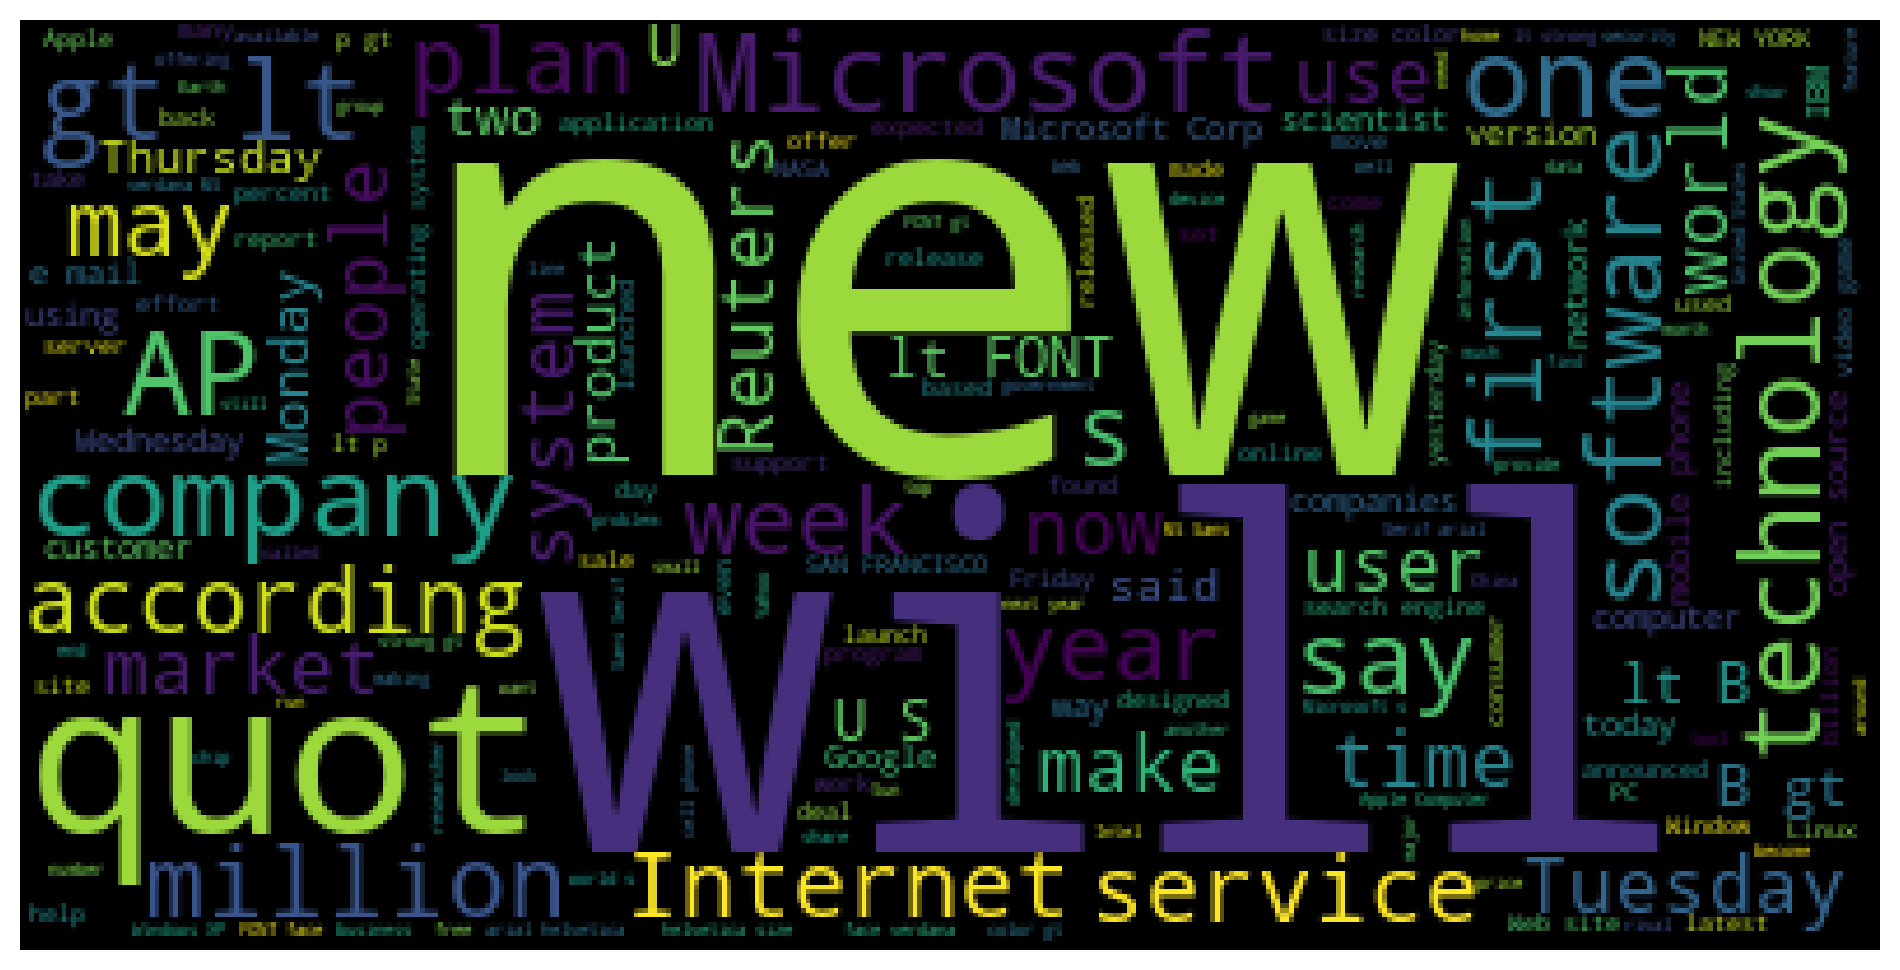

In [48]:
wordcloud4 = WordCloud().generate(' '.join(df[df['Class Index']==4]['Description']))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [37]:
df[df['Description'].str.contains("reuters")]

Class Index                                              Title  \
5                 3      FDA Reviewers Mixed Over Two New Cancer Drugs   
10                3    Analysts See Grim Future for Wet Seal (Reuters)   
11                1       Japan Quake Survivors Face Rain, Aftershocks   
14                2          Turin Unveils Mascots as Countdown Begins   
24                3           Dollar Continues Slide Vs Euro (Reuters)   
...             ...                                                ...   
119961            4  Russia Could Finish Kyoto Approval by Year-End...   
119962            3   TiVo Net Loss Widens; Subscribers Grow (Reuters)   
119967            3          Oil Ends Below \$50 on Nigerian Ceasefire   
119973            1    Zimbabwe Opposition Leader Acquitted of Treason   
119991            3              ImClone Posts Profit on Erbitux Sales   

                                              Description  
5       washington  reuters    u s  food and drug admi...  
10      reuters   wet seal inc   wtsla o  may have lit...  
11      ojiya  japan  reuters    some         weary su...  
14      rome  reuters    italy revved its marketing en...  
24      reuters   the dollar slid back toward last wee...  
...                                                   ...  
119961  reuters   russia could ratify the kyoto protoc...  
119962  reuters   tivo inc   maker of digital televisi...  
119967  new york  reuters    oil prices slid from reco...  
119973  harare  reuters    zimbabwe s opposition leade...  
119991  chicago  reuters    imclone systems inc   lt a...  

[12944 rows x 3 columns]

In [4]:

def data_cleaning (text):
    text = text.lower()
    text = text.strip() 
    text= text.replace('reuters','')
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"https\S+", "", text)
    text = re.sub("[^a-zA-Z]",' ', text)
    text = " ".join([lemmatizer.lemmatize(i) for i in word_tokenize(text)]) #lemmatizer
    text = re.sub(' +', ' ', text) #remove multible spaces  
   
    return text

In [5]:
df.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [8]:
#clean the data

df['Description'] = df['Description'].apply(lambda x:   data_cleaning(x))
df['Description'].head()

0    that s about one percent of the total work for...
1    afp hundred of people were feared trapped in s...
2    presient bush swept through battleground state...
3    hoping to accelerate the deployment of a new w...
4    a rebel group battling rival militia and gover...
Name: Description, dtype: object

In [9]:
df['Description'][3]

'hoping to accelerate the deployment of a new wireless technology intel corp announced monday it s invested in a venture started by billionaire craig mccaw to deliver high speed internet service over the airwave'

## TF-IDF 

In [10]:
X=df['Description']
y=df['Class Index']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(stop_words='english')
X = tfidfconverter.fit_transform(X) 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

### Modeling

In [16]:
#LinearSVC

from sklearn.svm import LinearSVC
clf = LinearSVC()
classifier = clf.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [17]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
print("******************************************")
print(f"Accuracy : {metrics.accuracy_score(y_test,predictions)}")

[[2639  105  149  102]
 [  40 2894   23   27]
 [  99   34 2592  252]
 [  95   26  214 2709]]
******************************************
Accuracy : 0.9028333333333334


In [18]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=200000)
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.92      0.88      0.90      2995
           2       0.95      0.97      0.96      2984
           3       0.87      0.87      0.87      2977
           4       0.88      0.89      0.88      3044

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



## **word2vec**

In [30]:
import gensim
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Others
import json
import gensim
import plotly.graph_objects as go

In [18]:
# Loading the pre-trained Word2Vec model
word2vec_path = 'GoogleNews-vectors-negative300.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)

In [9]:
# Tokenize
#.apply(lambda x:   data_cleaning(str(x)))
df['Title'] = df['Title'].apply(nltk.word_tokenize)
df['Description'] = df['Description'].apply(nltk.word_tokenize)

df['Title'].head()


0    [wall, st, bears, claw, back, into, the, black...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks, outlook, re...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, all, time, record, pos...
Name: Title, dtype: object

In [10]:
# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
df['Title'] = df['Title'].apply(lambda x: [item for item in x if item not in stop_words])
df['Description'] = df['Description'].apply(lambda x: [item for item in x if item not in stop_words])
df['Title'].head()

0    [wall, st, bears, claw, back, black, reuters, ...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, economy, cloud, stocks, outlook, reuters...
3    [iraq, halts, oil, exports, main, southern, pi...
4    [oil, prices, soar, time, record, posing, new,...
Name: Title, dtype: object

In [25]:
# Feature-target split
X, y = df.drop('Class Index', axis = 1), df['Class Index']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)


In [26]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)


In [77]:
# Classifiers
names = [
   "Logistic Regression",
   "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "AdaBoost",
]

models = [
   LogisticRegression(max_iter = 1000),
   KNeighborsClassifier(n_neighbors = 50, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    AdaBoostClassifier()
]

In [76]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        print(model)
        timeS=time.time()
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
        timeE=time.time()
        elapsedtime_S=timeE-timeS
    
        print(f'Training took: {elapsedtime_S}S')
        print(f'Training took: {elapsedtime_S/60}M')
        print('======================')
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [34]:
data_train

Title  \
55219   [sales, tax, deduction, revive, sale, tax, ded...   
24558   [hewitt, advance, us, open, final, hewitt, adv...   
55891           [purdue, win, pretty, purdu, win, pretti]   
79305   [valero, buy, keneb, billion, valero, buy, ken...   
61968   [high, gas, price, force, lifestyle, change, h...   
...                                                   ...   
93176   [specter, get, hatch, support, chair, panel, a...   
80037   [stock, move, despite, election, jitters, stoc...   
30727   [jaguar, cut, job, plant, central, england, ja...   
112859  [nuggets, add, raptors, woes, nugget, add, rap...   
11590   [election, new, prime, minister, take, place, ...   

                                              Description  Class Index  
55219   [washington, taxpayers, able, deduct, state, s...            3  
24558   [lleyton, hewitt, beat, sister, boyfriend, joa...            2  
55891   [state, college, pa, taylor, stubblefield, cat...            2  
79305   [energy, transport, company, buy, kaneb, servi...            3  
61968   [workers, businesses, organizations, spike, en...            3  
...                                                   ...          ...  
93176   [ap, sen, arlen, specter, gain, grind, tuesday...            1  
80037   [despite, nervousness, presidential, election,...            3  
30727   [luxury, carmaker, jaguar, say, friday, stop, ...            3  
112859  [toronto, cp, injure, vince, carter, bench, to...            2  
11590   [islamabad, national, assembly, meet, special,...            1  

[96000 rows x 3 columns]

In [39]:
# Word2Vec embedding
X_train_embed = get_word2vec_embeddings(word2vec, data_train['Description'])
X_val_embed = get_word2vec_embeddings(word2vec, data_val['Description'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['Description'])

In [45]:
import scipy
import time

In [46]:
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_val_w2v = scipy.sparse.csr_matrix(X_val_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [78]:
# Summary of baseline models
score(X_train_w2v, y_train, X_val_w2v, y_val, names = names, models = models)

LogisticRegression(max_iter=1000)
Training took: 49.886364698410034S
Training took: 0.8314394116401672M
KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Training took: 1735.5896453857422S
Training took: 28.926494089762368M
DecisionTreeClassifier()
Training took: 404.934686422348S
Training took: 6.748911440372467M
SVC(kernel='linear')
Training took: 2364.857876777649S
Training took: 39.41429794629415M
RandomForestClassifier()
Training took: 1346.3371481895447S
Training took: 22.438952469825743M
SGDClassifier()
Training took: 1.6779954433441162S
Training took: 0.027966590722401936M
RidgeClassifier()
Training took: 4.203911542892456S
Training took: 0.07006519238154094M
AdaBoostClassifier()
Training took: 213.02509784698486S
Training took: 3.5504182974497476M


Classifier  Training accuracy  Validation accuracy
3           Linear SVM           0.887573             0.883167
1       KNN Classifier           0.887240             0.881750
5       SGD Classifier           0.881271             0.879833
0  Logistic Regression           0.883552             0.879750
6     Ridge Classifier           0.878781             0.878500
4        Random Forest           0.998635             0.863833
7             AdaBoost           0.785740             0.788000
2        Decision Tree           0.998646             0.706750